In [89]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed 

In [90]:
X, y = make_blobs(n_samples = 120, n_features = 2, centers = 4, cluster_std = 0.4)
X.shape

(120, 2)

In [91]:
y.shape

(120,)

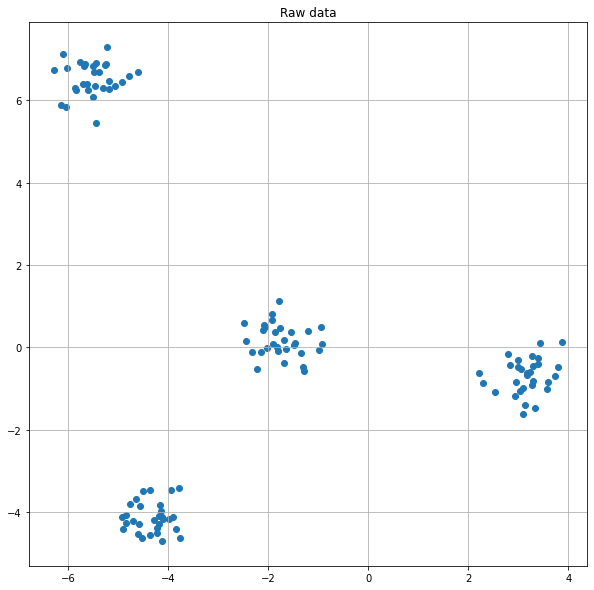

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize = [10, 10])
plt.scatter(X[:, 0], X[:, 1])
plt.title('Raw data')
plt.grid()
plt.show()

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'random').fit(X)

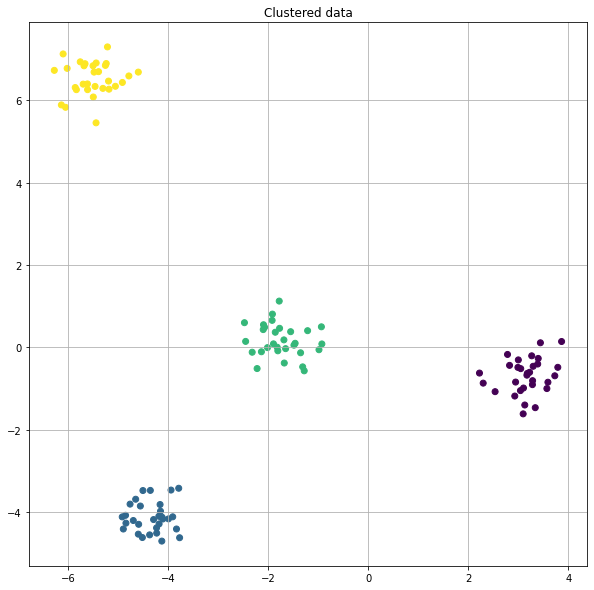

In [94]:
plt.figure(figsize = [10, 10])
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.title('Clustered data')
plt.grid()
plt.show()

In [95]:
print('Inertia: {}'.format(kmeans.inertia_))

Inertia: 36.1677666521929


In [96]:
#3 below functions were downloaded from jqm_cvi package
def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])          
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])            
    return np.max(values)

def dunn(k_list):
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])       
        big_deltas[k] = big_delta(k_list[k])
    di = np.min(deltas)/np.max(big_deltas)
    return di

In [97]:
cluster0 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 0])
cluster1 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 1])
cluster2 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 2])
cluster3 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 3])
print('Dunn index: {}'. format(dunn([cluster0, cluster1, cluster2, cluster3])))

Dunn index: 1.6824673231766976


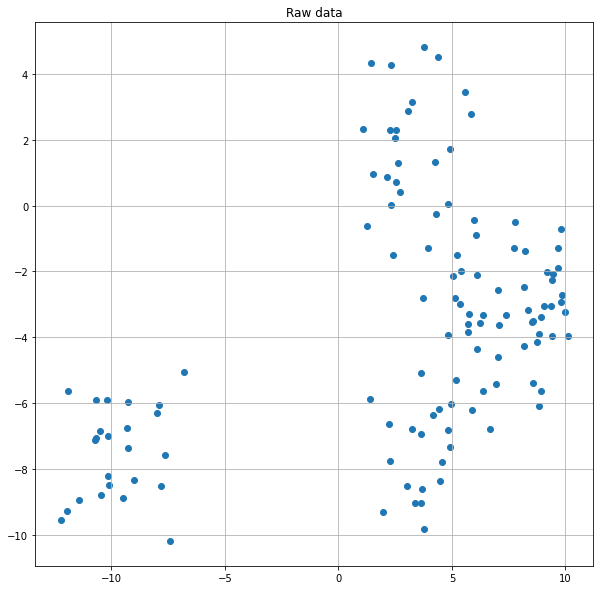

In [98]:
#Exercise 2

X, y = make_blobs(n_samples = 120, n_features = 2, centers = 5, cluster_std = 1.5)
plt.figure(figsize = [10, 10])
plt.scatter(X[:, 0], X[:, 1])
plt.title('Raw data')
plt.grid()
plt.show()

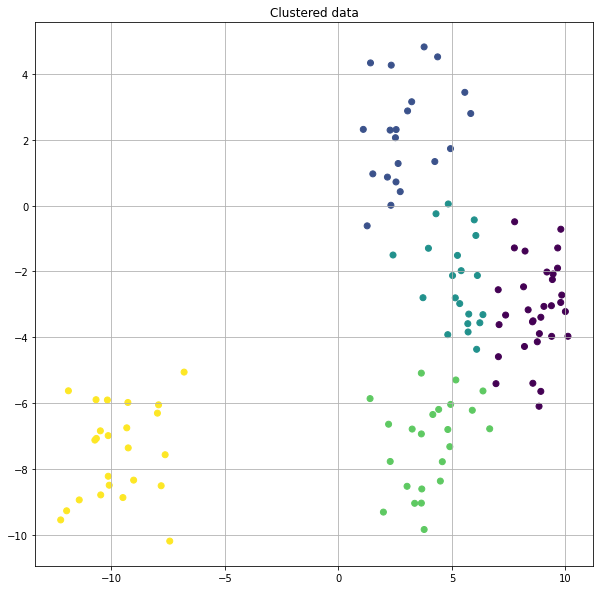

In [99]:
#Clusterization for 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'random').fit(X)
plt.figure(figsize = [10, 10])
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.title('Clustered data')
plt.grid()
plt.show()

In [100]:
print('Inertia: {}'.format(kmeans.inertia_))
cluster0 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 0])
cluster1 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 1])
cluster2 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 2])
cluster3 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 3])
cluster4 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 4])
print('Dunn index: {}'. format(dunn([cluster0, cluster1, cluster2, cluster3, cluster4])))

Inertia: 404.3021033893366
Dunn index: 0.087106556418986


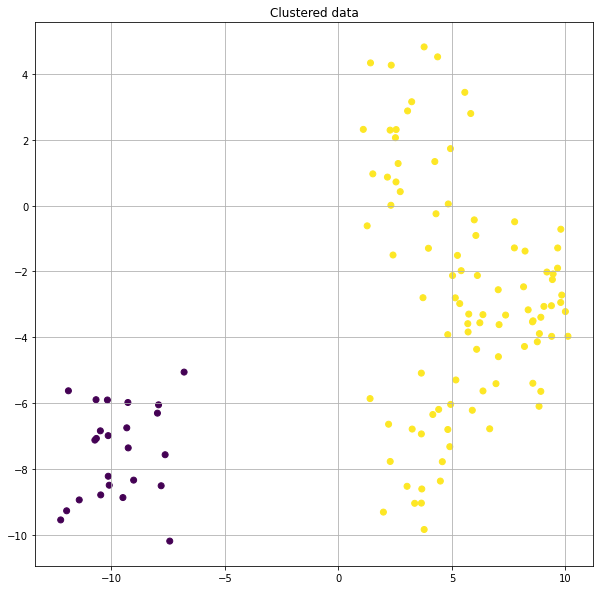

In [101]:
#Clusterization for 2 clusters
kmeans = KMeans(n_clusters = 2, init = 'random').fit(X)
plt.figure(figsize = [10, 10])
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.title('Clustered data')
plt.grid()
plt.show()

In [102]:
print('Inertia: {}'.format(kmeans.inertia_))
cluster0 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 0])
cluster1 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 1])
print('Dunn index: {}'. format(dunn([cluster0, cluster1])))

Inertia: 1900.9991400585452
Dunn index: 0.5614432294861762


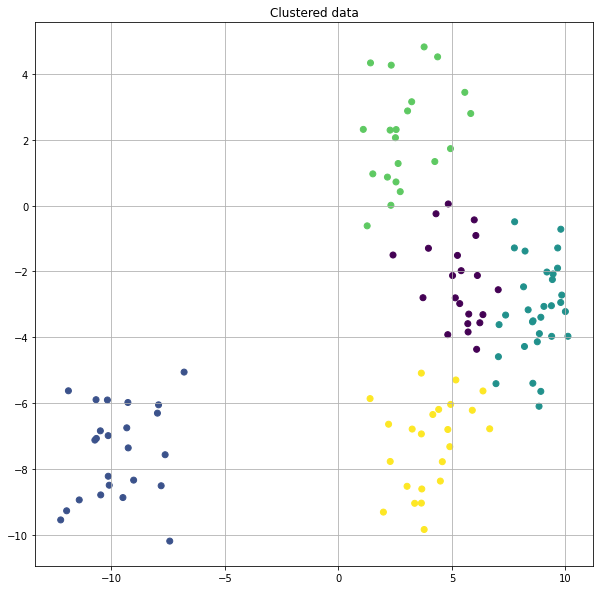

In [103]:
#Exercise 3

kmeans = KMeans(n_clusters = 5, init = 'k-means++').fit(X)
plt.figure(figsize = [10, 10])
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.title('Clustered data')
plt.grid()
plt.show()

In [104]:
print('Inertia: {}'.format(kmeans.inertia_))
cluster0 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 0])
cluster1 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 1])
cluster2 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 2])
cluster3 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 3])
cluster4 = np.array([X[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 4])
print('Dunn index: {}'. format(dunn([cluster0, cluster1, cluster2, cluster3, cluster4])))

Inertia: 404.2774318328359
Dunn index: 0.087106556418986


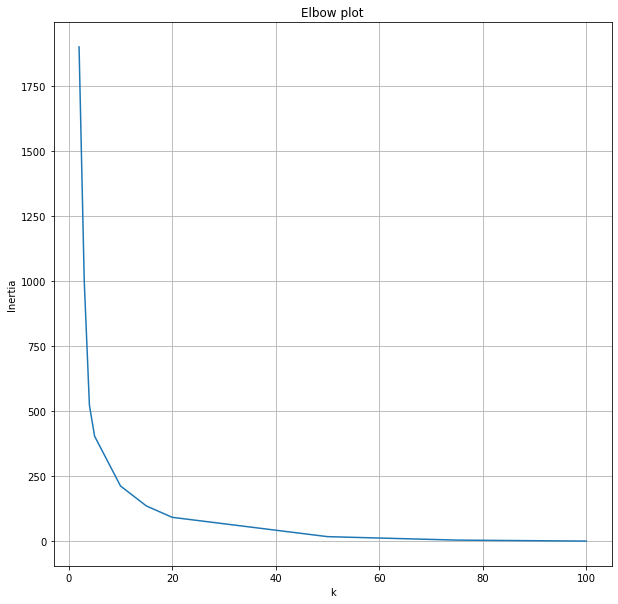

In [106]:
#As we can see, almost no difference can be observed

#Exercise 4
ks = [2, 3, 4, 5, 10, 15, 20, 50, 75, 100]
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters = k, init = 'k-means++').fit(X)
    inertias.append(kmeans.inertia_)
plt.figure(figsize = [10, 10])
plt.plot(ks, inertias)
plt.grid()
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

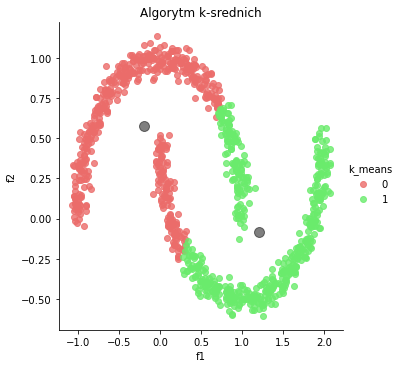

In [107]:
#Exercise 5

from sklearn.datasets.samples_generator import make_moons
import seaborn as sns
import pandas as pd
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])
kmeans = KMeans(n_clusters = 2).fit(X_moon)
y_km = kmeans.labels_
centers = kmeans.cluster_centers_
 
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

In [ ]:
#Data was not grouped correctly